In [68]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torchvision
from torch.utils import data
import pandas as pd
import matplotlib.pyplot as plt
import os
from skimage import io, transform

from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms, utils
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode


In [2]:
import os
from os.path import join
import json
import random
import itertools
import re
import datetime
import cairocffi as cairo
import editdistance
import numpy as np
from scipy import ndimage
import pylab
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from collections import Counter
import cv2

In [3]:
def get_counter(dirpath, tag):
    dirname = os.path.basename(dirpath)
    ann_dirpath = join(dirpath, 'ann')
    letters = ''
    lens = []
    for filename in os.listdir(ann_dirpath):
        json_filepath = join(ann_dirpath, filename)
        ann = json.load(open(json_filepath, 'r'))
        tags = ann['tags']
        if tag in tags:
            description = ann['description']
            lens.append(len(description))
            letters += description
    print('Max plate length in "%s":' % dirname, max(Counter(lens).keys()))
    return Counter(letters)
c_val = get_counter('data/anpr_ocr__train', 'val')
c_train = get_counter('data/anpr_ocr__train', 'train')
letters_train = set(c_train.keys())
letters_val = set(c_val.keys())
if letters_train == letters_val:
    print('Letters in train and val do match')
else:
    raise Exception()
# print(len(letters_train), len(letters_val), len(letters_val | letters_train))
letters = sorted(list(letters_train))
print('Letters:', ' '.join(letters))

Max plate length in "anpr_ocr__train": 8
Max plate length in "anpr_ocr__train": 8
Letters in train and val do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H K M O P T X Y


In [4]:
def labels_to_text(labels):
    return ''.join(list(map(lambda x: letters[int(x)], labels)))

def text_to_labels(text):
    return list(map(lambda x: letters.index(x), text))

def is_valid_str(s):
    for ch in s:
        if not ch in letters:
            return False
    return True


In [161]:
class NumberPlateDataset(Dataset):
    def __init__(self,dirpath):
                 #,img_h, img_w):
       # self.img_w = img_w
       # self.img_h = img_h
        self.dirpath = dirpath       
   
    def __getitem__(self, i):
        #the description of image
        img_dirpath = join(self.dirpath, 'img')
        print(img_dirpath)
        self.label = []
        filename = os.listdir(img_dirpath)
        name, ext = os.path.splitext(filename[i])
        print(name,ext)
        self.label.append([name])
        
        #reading the images in folder "img"
        #img = cv2.imread(join(img_dirpath,filename[i]))
        img = io.imread(join(img_dirpath,filename[i]))
        #img = Image.open(join(img_dirpath,filename[i]))

        print(filename[i])
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
       # img = cv2.resize(img, (self.img_h, self.img_w))
        img = img.astype(np.float32)
        #img /= 255
        print(np.shape(img))
        sample = {'image': img}
        return sample, self.label
    
    def __len__(self):
        img_dirpath = join(self.dirpath, 'img')
        filename = os.listdir(img_dirpath)
        return len(filename)

In [162]:
plate_dataset = NumberPlateDataset(dirpath='data/anpr_ocr__train')
                                   #,img_h = 64,img_w=128 )

In [144]:
def imgshow_(dirpath):
             #,  img_h, img_w)
    #self.dirpath = dirpath  
    img_dirpath = join(dirpath, 'img')
    print(img_dirpath)
    
    filename = os.listdir(img_dirpath)        
    #reading the images in folder "img"
    #img = cv2.imread(join(img_dirpath,filename[i]))
    img = io.imread(join(img_dirpath,filename[i]), as_grey = True)
        #img = Image.open(join(img_dirpath,filename[i]))

    print(filename[i])
    print(np.shape(img))
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   # img = cv2.resize(img, (self.img_h, self.img_w))
    #img = img.astype(np.float32)
    img /= 255
    plt.show() 

In [109]:
p_dataset = imgshow_(dirpath='data/anpr_ocr__train')

data/anpr_ocr__train/img
M832XM11.png
(34, 152, 3)


In [93]:
transformed_dataset = FaceLandmarksDataset(csv_file='faces/face_landmarks.csv',
                                           root_dir='faces/' )


data/anpr_ocr__train/img
A676AP95 .png
A676AP95.png
(34, 152)
<class 'tuple'>
0 (2,)


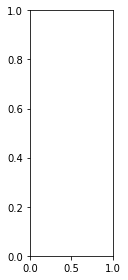

data/anpr_ocr__train/img
H375OY42 .png
H375OY42.png
(34, 152)
<class 'tuple'>
1 (2,)


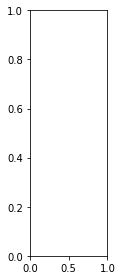

data/anpr_ocr__train/img
B880KH57 .png
B880KH57.png
(34, 152)
<class 'tuple'>
2 (2,)


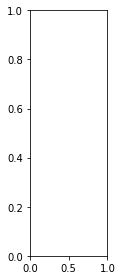

data/anpr_ocr__train/img
M832XM11 .png
M832XM11.png
(34, 152)
<class 'tuple'>
3 (2,)


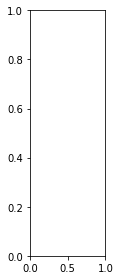

In [164]:
for i in range(len(plate_dataset)):
    sample = plate_dataset[i]
    print(type(sample))
    print(i,np.shape(sample))
    i_mage = sample[0]
    #print(sample['image'])
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    #ax.axis('off')
    plt.show(i_mage)
    if i == 3:     
        break
  